C:\Users\Alex\anaconda3\envs\torch_1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Alex\anaconda3\envs\torch_1\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


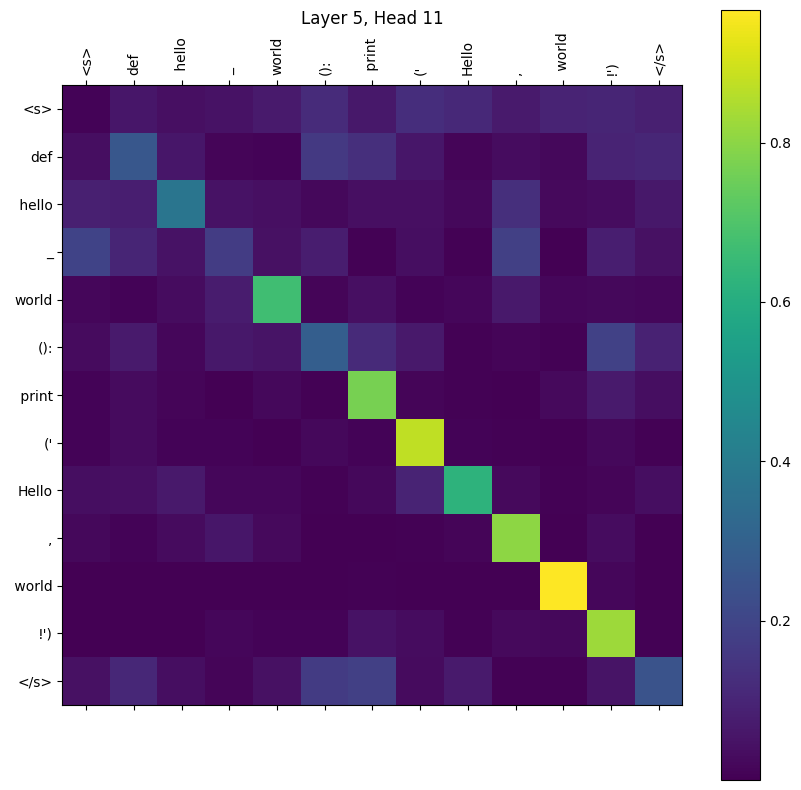

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import RobertaModel, RobertaTokenizer
import torch


tokenizer = RobertaTokenizer.from_pretrained('huggingface/CodeBERTa-small-v1')
model = RobertaModel.from_pretrained('huggingface/CodeBERTa-small-v1', output_attentions=True)

inputs = tokenizer("def hello_world(): print('Hello, world!')", return_tensors='pt')

outputs = model(**inputs)

attentions = outputs.attentions

def plot_attention(attention, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(attention, cmap='viridis')
    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(inputs['input_ids'][0])))
    ax.set_yticks(np.arange(len(inputs['input_ids'][0])))

    ax.set_xticklabels([tokenizer.decode([i]) for i in inputs['input_ids'][0]], rotation=90)
    ax.set_yticklabels([tokenizer.decode([i]) for i in inputs['input_ids'][0]])

    plt.title(title)
    plt.show()

last_layer = len(attentions) - 1  
last_head = attentions[0].size(1) - 1  
plot_attention(attentions[last_layer][0][last_head].detach().numpy(), f'Layer {last_layer}, Head {last_head}')

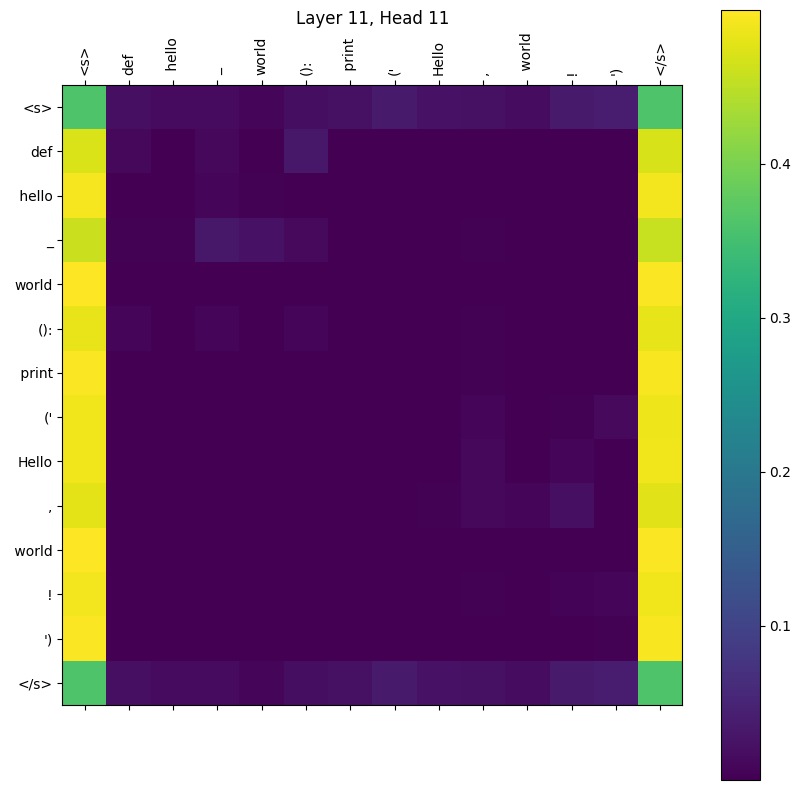

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import RobertaModel, RobertaTokenizer
import torch


tokenizer = RobertaTokenizer.from_pretrained('microsoft/codebert-base')
model = RobertaModel.from_pretrained('microsoft/codebert-base', output_attentions=True)

inputs = tokenizer("def hello_world(): print('Hello, world!')", return_tensors='pt')

outputs = model(**inputs)

attentions = outputs.attentions

def plot_attention(attention, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(attention, cmap='viridis')
    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(inputs['input_ids'][0])))
    ax.set_yticks(np.arange(len(inputs['input_ids'][0])))

    ax.set_xticklabels([tokenizer.decode([i]) for i in inputs['input_ids'][0]], rotation=90)
    ax.set_yticklabels([tokenizer.decode([i]) for i in inputs['input_ids'][0]])

    plt.title(title)
    plt.show()

layer = len(attentions) - 1  
head = attentions[layer].shape[1] - 1  


plot_attention(attentions[layer][0][head].detach().numpy(), f'Layer {layer}, Head {head}')
